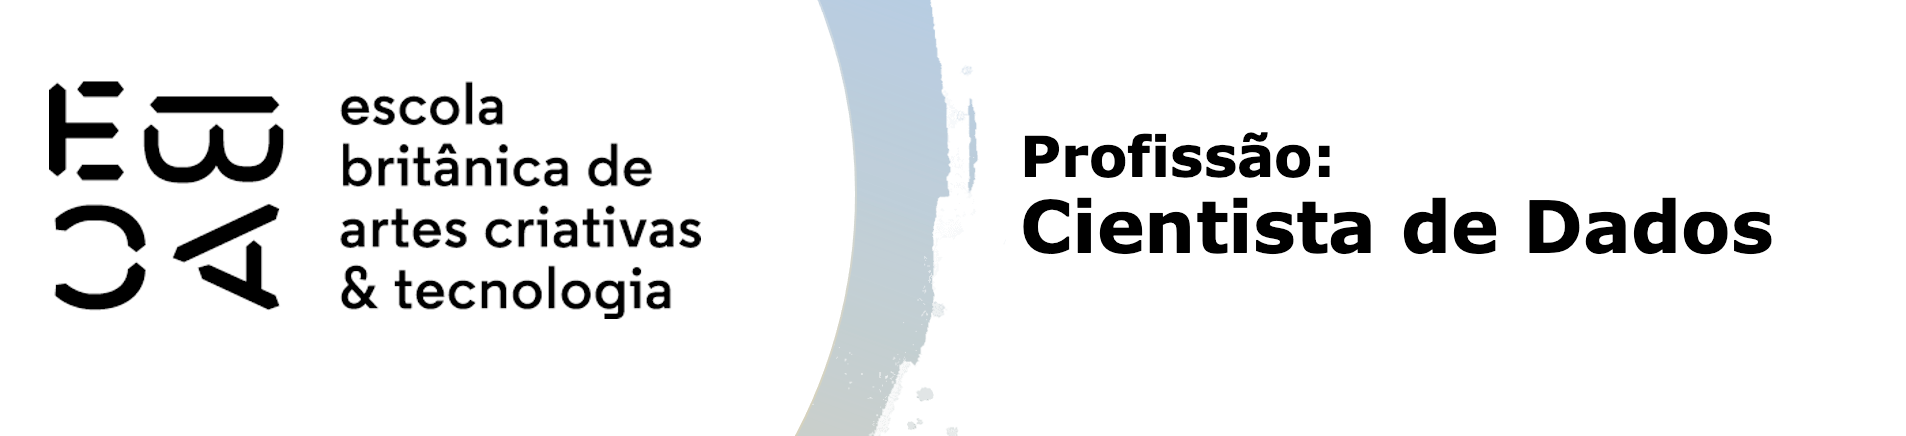

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [16]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [18]:



sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


df = pd.read_csv("online_shoppers_intention.csv")

df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


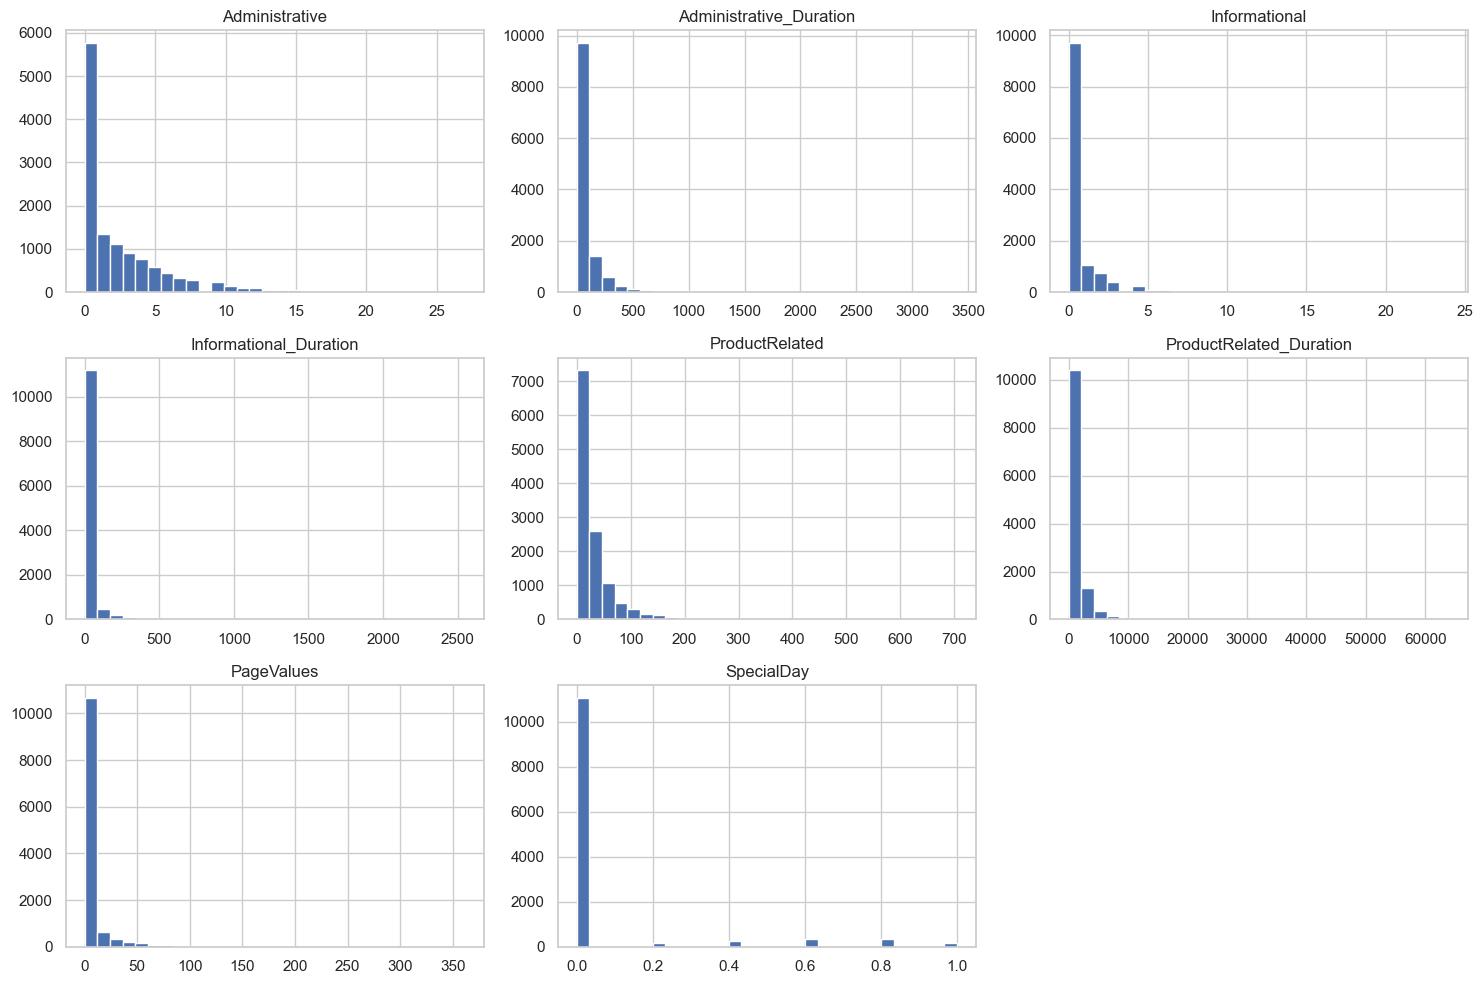

In [19]:

df = pd.read_csv("online_shoppers_intention.csv")
df.isnull().sum()


import matplotlib.pyplot as plt
import seaborn as sns

# Distribuições numéricas
numeric_features = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'PageValues', 'SpecialDay'
]

df[numeric_features].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

In [20]:
df['Administrative_Duration'] = np.log1p(df['Administrative_Duration'])
df['Informational_Duration'] = np.log1p(df['Informational_Duration'])
df['ProductRelated_Duration'] = np.log1p(df['ProductRelated_Duration'])
df['PageValues'] = np.log1p(df['PageValues'])

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [22]:
# Converter 'Month' para variável categórica com one-hot
df = pd.get_dummies(df, columns=['Month'], drop_first=True)

# Converter 'Weekend' para numérico
df['Weekend'] = df['Weekend'].astype(int)

In [26]:
features_to_cluster = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'PageValues', 'SpecialDay',
    'Weekend'
]

# Adiciona as colunas one-hot de Month
month_dummies = [col for col in df.columns if col.startswith('Month_')]

X = df[features_to_cluster + month_dummies]

# Padroniza e aplica os modelos de cluster
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_3 = AgglomerativeClustering(n_clusters=3, linkage='ward')
model_4 = AgglomerativeClustering(n_clusters=4, linkage='ward')

df['cluster_3'] = model_3.fit_predict(X_scaled)
df['cluster_4'] = model_4.fit_predict(X_scaled)

In [27]:
df.groupby('cluster_3')[features_to_cluster].mean()
df.groupby('cluster_4')[features_to_cluster].mean()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,PageValues,SpecialDay,Weekend
cluster_4,,,,,,,,,
0,3.163150,3.140867,0.514065,0.914096,32.640647,6.092161,0.760014,0.000000,0.241210
1,1.846495,2.023698,0.061061,0.055388,26.483882,5.941548,0.702196,0.000921,0.237080
2,1.297357,1.471108,0.110761,0.180001,19.892700,5.123669,0.133822,0.234110,0.190371
3,4.873594,3.982123,2.553830,4.399556,67.670059,7.357588,1.110051,0.004285,0.283878


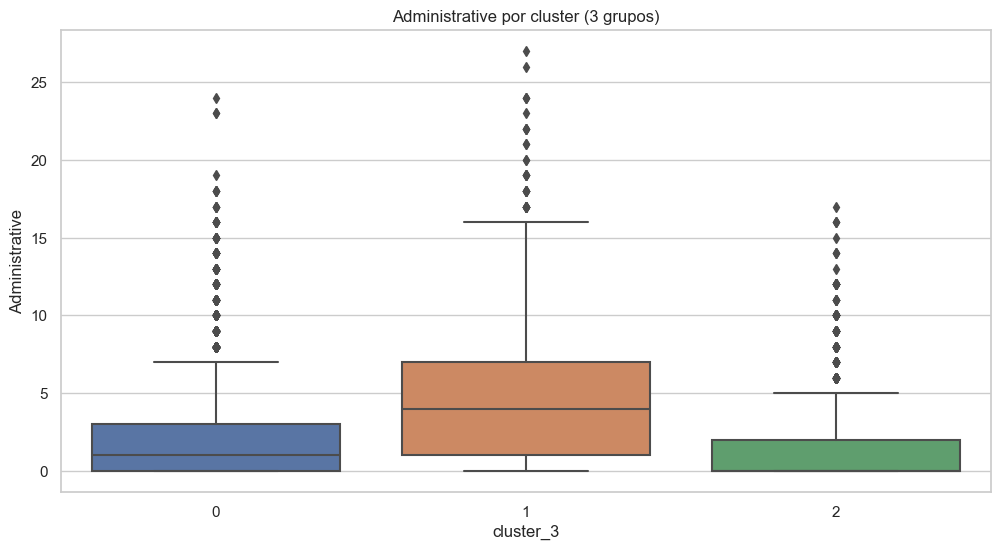

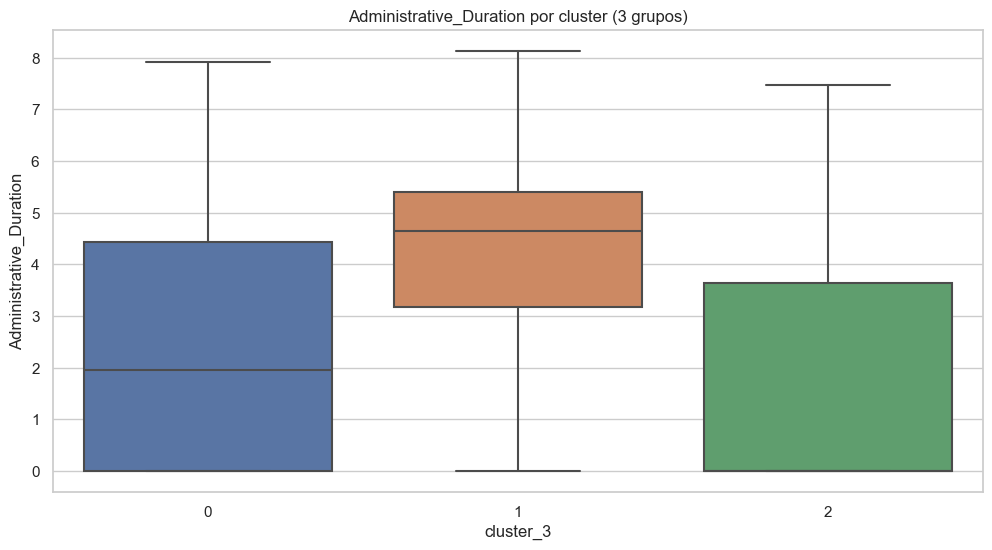

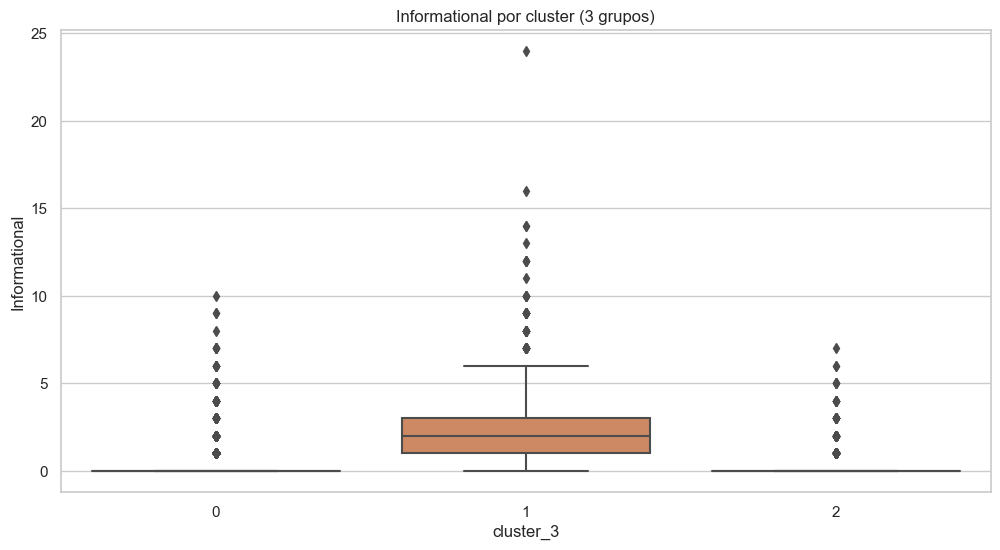

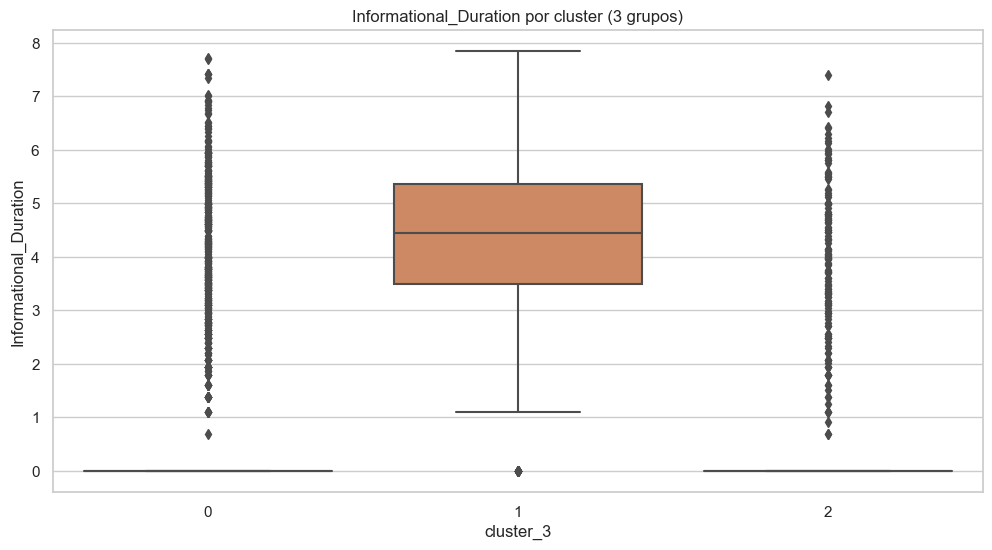

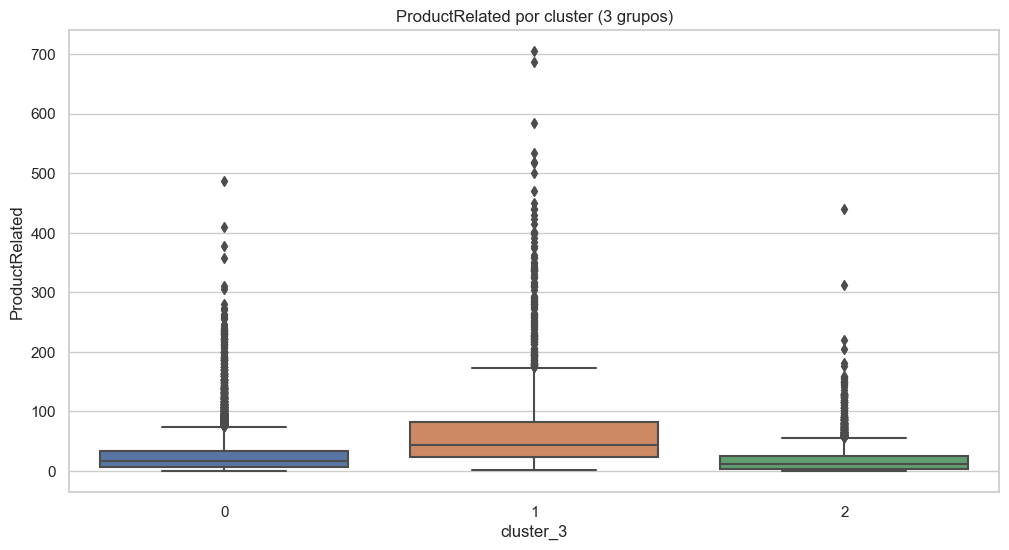

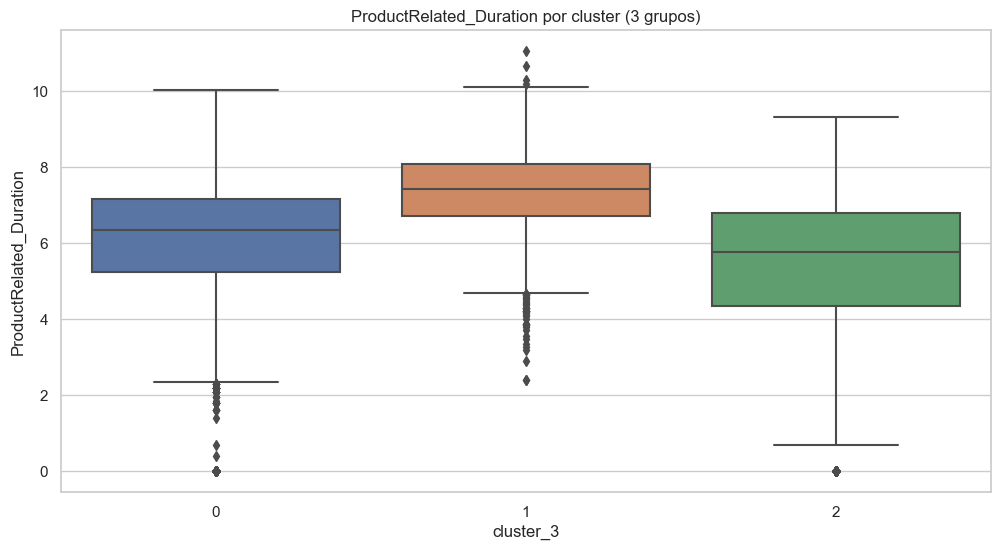

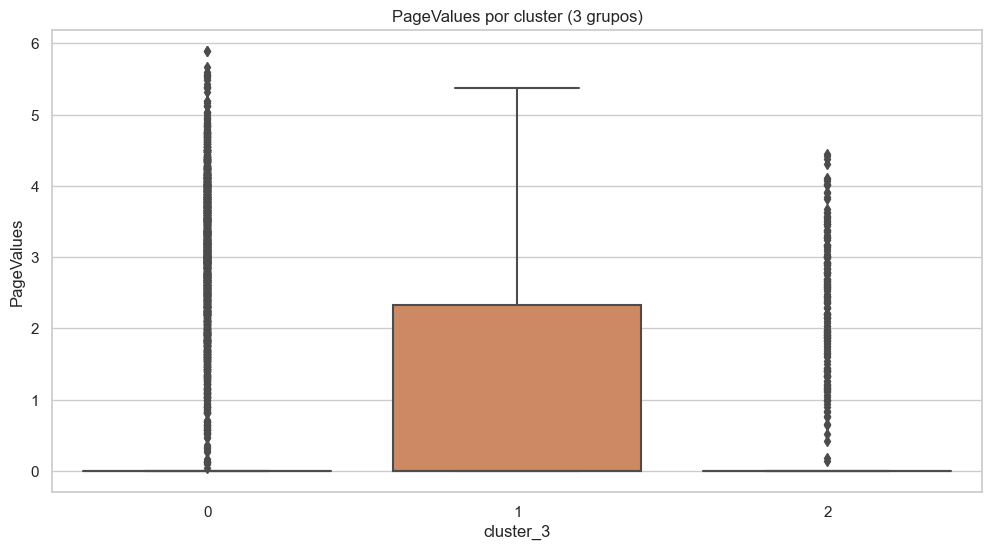

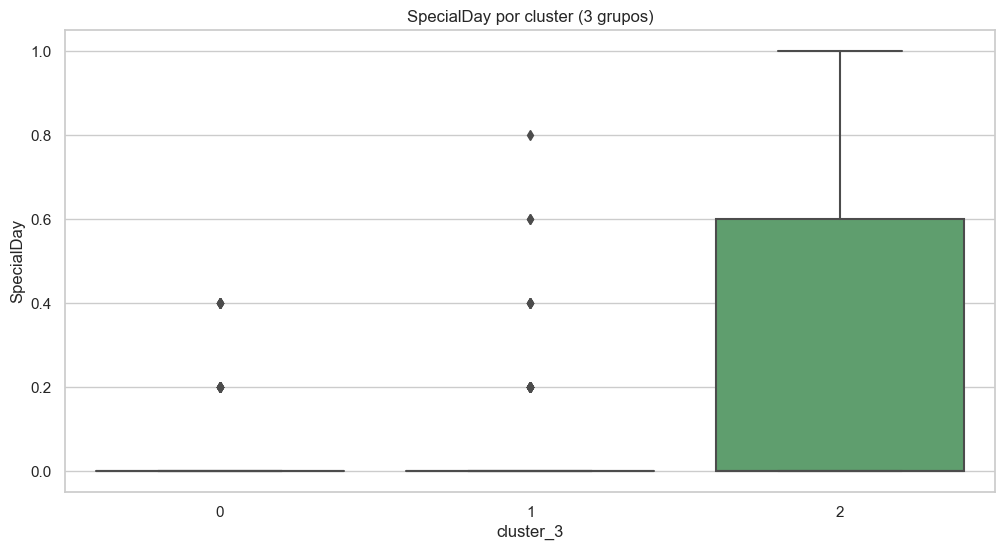

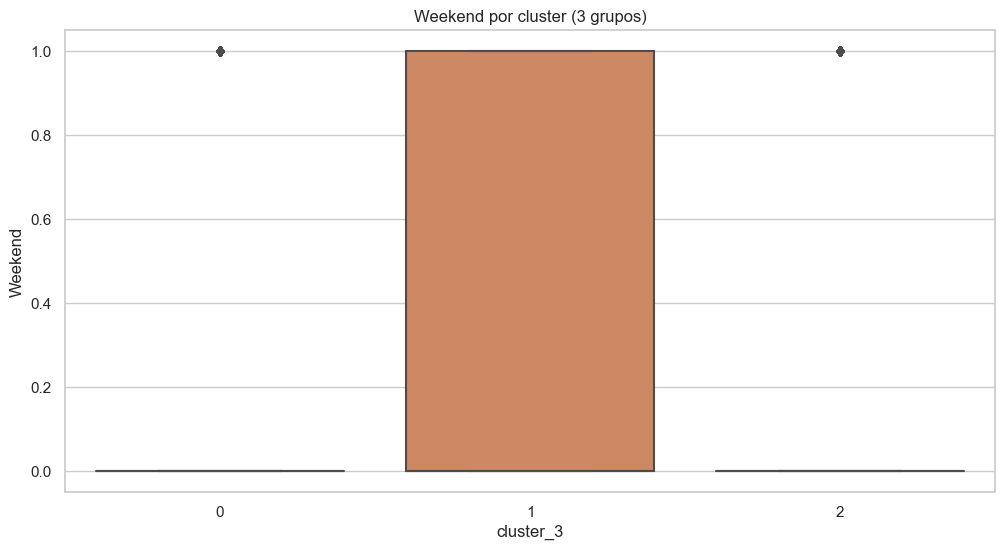

In [ ]:
for feature in features_to_cluster:
    sns.boxplot(x='cluster_3', y=feature, data=df)
    plt.title(f'{feature} por cluster (3 grupos)')
    plt.show()

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [30]:
# Comparando receita entre os clusters
pd.crosstab(df['cluster_3'], df['Revenue'], normalize='index')
pd.crosstab(df['cluster_4'], df['Revenue'], normalize='index')

# BounceRate médio
df.groupby('cluster_3')['BounceRates'].mean()


cluster_3
0    0.017849
1    0.006686
2    0.041255
Name: BounceRates, dtype: float64

In [31]:
df.groupby('cluster_4')['BounceRates'].mean()

cluster_4
0    0.015893
1    0.018323
2    0.041255
3    0.006686
Name: BounceRates, dtype: float64

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [32]:
# Revenue por cluster_3
print("=== Revenue por cluster_3 ===")
print(pd.crosstab(df['cluster_3'], df['Revenue'], margins=True))
print("\nProporção de compradores por grupo (cluster_3):")
print(pd.crosstab(df['cluster_3'], df['Revenue'], normalize='index'))

# Revenue por cluster_4
print("\n=== Revenue por cluster_4 ===")
print(pd.crosstab(df['cluster_4'], df['Revenue'], margins=True))
print("\nProporção de compradores por grupo (cluster_4):")
print(pd.crosstab(df['cluster_4'], df['Revenue'], normalize='index'))


=== Revenue por cluster_3 ===
Revenue    False  True    All
cluster_3                    
0           5948  1337   7285
1           1389   478   1867
2           3085    93   3178
All        10422  1908  12330

Proporção de compradores por grupo (cluster_3):
Revenue       False     True 
cluster_3                    
0          0.816472  0.183528
1          0.743974  0.256026
2          0.970736  0.029264

=== Revenue por cluster_4 ===
Revenue    False  True    All
cluster_4                    
0           1155   267   1422
1           4793  1070   5863
2           3085    93   3178
3           1389   478   1867
All        10422  1908  12330

Proporção de compradores por grupo (cluster_4):
Revenue       False     True 
cluster_4                    
0          0.812236  0.187764
1          0.817500  0.182500
2          0.970736  0.029264
3          0.743974  0.256026


##  Conclusão: Agrupamento com 3 clusters

O agrupamento com **3 clusters** é mais simples e já consegue separar bem os padrões de comportamento dos usuários:

- Um grupo de **compradores frequentes** (`Cluster 1`)
- Um grupo de **navegadores engajados** (`Cluster 0`)
- Um grupo com **comportamento desinteressado** (`Cluster 2`)

###  Características dos grupos (3 clusters)

| Cluster | Nome sugerido           | Características principais                                     |
|---------|-------------------------|----------------------------------------------------------------|
| 0       | Navegadores engajados   | Interação média, boa chance de conversão (~18%)               |
| 1       | Compradores frequentes  | Maior taxa de conversão (25%) e menor bounce rate             |
| 2       | Visitantes casuais      | Pouca interação e baixa taxa de conversão (~3%)               |

---

O agrupamento com **4 clusters** apresenta uma segmentação mais detalhada, mas com dois clusters muito semelhantes em comportamento.

###  Proporção de compradores por grupo

| Cluster | % de compradores | Interpretação                        |
|---------|------------------|--------------------------------------|
| 0       | 18.78%           | Engajados                            |
| 1       | 18.25%           | Parecidos com o cluster 0            |
| 2       | 2.93%            | Visitantes desinteressados           |
| 3       | 25.60%           | Compradores frequentes               |
